# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


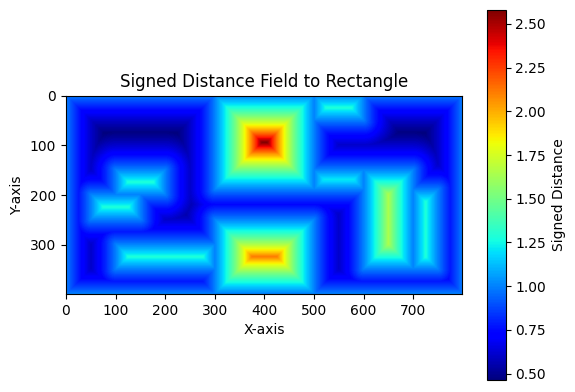

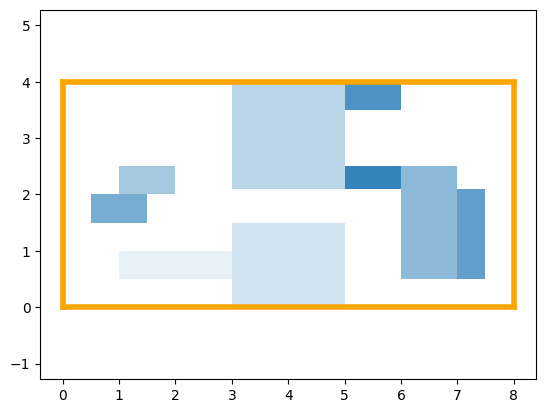

In [1]:
import torch
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world_maze.yaml")


sdf.plot_barrier()
sdf.plot_obs(plt.gca())

plt.axis('equal')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [1]:
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world_complex.yaml")

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quadrotor, sdf)
planner = rrt.get_planner()
x, u = rrt.get_trajectory(planner)

np.save("./initial_guesses/x_complex.npy", x)
np.save("./initial_guesses/u_complex.npy", u)

anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()


...planning...


In [1]:
from ilqr import iLQR
from lqrrt import PathPlannerLQRRT

import numpy as np
from quadrotor import QuadrotorPendulum
from world import SignedDistanceField

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = 100 * Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quad = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
suffix = ""
sdf = SignedDistanceField("./configs/world%s.yaml" % suffix)

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quad, sdf)
optim = iLQR("./configs/ilqr.yaml", rrt)

x = np.load("./initial_guesses/x%s.npy" % suffix)
u = np.load("./initial_guesses/u%s.npy" % suffix)
print(x.shape)

xx, uu = optim.calculate_optimal_trajectory(x[0], rrt.xf, u, rrt.dt)

In [ ]:
anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()

In [3]:
iilqr.animate()